# Project: Investigate a Dataset (TMDb Movie Data)

## Contents of project
<ul>
<li><a href="#introduction">Introduction</a></li>
<li><a href="#data_wrangling">Data Wrangling</a></li>
<li><a href="#explore">Exploratory Data Analysis</a></li>
<li><a href="#conclusion">Conclusions</a></li>
</ul>

<a id='introuction'></a>
## Introduction
This project is to analyse movie data from TMDb ([The Movie Database](https://www.themoviedb.org)) for over 10,000 movies colleted by [Kaggle](https://www.kaggle.com). The data contains information such as genre, cast, budget, revenue, popularity, rating, director, production, overview,vote_count etc. With this information the movie data can be analysed so that we can answer the questions. 

_Research questions I would like to explore :_

1. Trends of movies budget and revenue over the years.
2. Characterisation of movies with highest revenues by considering following:
    * Budget
    * Popularity
    * Cast
    * Genres
    * Director
3. Finding the best cordination of actor and director for highest revenue movie.

In [1]:

## import statements
import unicodecsv
from pprint import pprint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
%matplotlib inline #this is use to show the plot in the notebook

UsageError: unrecognized arguments: #this is use to show the plot in the notebook


In [3]:
#reading file
tmdb_csv_file = 'tmdb-movies.csv'

<a id='data_wrangling'></a>
## Data Wrangling



In [7]:
## reading  csv file:
tmdb_df = pd.read_csv(tmdb_csv_file)
                         
## printing first 3 rows of data:
tmdb_df.head(3)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


Observations:
* The data contains __imdb_id__ as well as __id__ from TMDb.
  These can be correlate data from both databases.
* The __budget__ and __revenue__ columns are not of much use as it will be more appropriate to use the adjusted values,
    __budget_adj__ and __revenue_adj__ to compare movies from different time periods.
* Let us assume them to be dollars('$') as no units are provided.


In [9]:
## Table details
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [11]:
## number of rows:
len(tmdb_df)

10866

In [17]:
# Des_movie is a function which aims to describe the information about a movie with a particular id:

def Des_movie(tmdb_id, df):
    '''
        Function movie_description aims to displays 
        
        info about a movie with a particular TMDb ID.
    '''
    movie_df = df[df['id'] == tmdb_id]
    # ^ this is still a dataframe... we need to convert this to a series:
    movie_info = pd.Series(tmdb_df.iloc[0])
    
    # printing out the relevant information:
    print('{}({}):'.format(movie_info['original_title'], movie_info[ 'release_year']))
    print('\tbudget (adj): {}$'.format(movie_info['budget_adj']))
    print('\trevenue (adj): {}$'.format(movie_info['revenue_adj']))
    print('\tdirector: {}'.format(movie_info['director'])) 
    print('\tgenres: {}'.format(', '.join(movie_info['genres'].split('|'))))
    print('\tcast: {}'.format(', '.join(movie_info['cast'].split('|'))))
    print('\average rating:', movie_info['vote_average'])
    print('\tpopularity:', movie_info['popularity'])
    
    



In [19]:
## Maximum Revenue

max_revenue = tmdb_df['revenue_adj'].idxmax()
max_revenue_id = tmdb_df.loc[max_revenue, 'id']
Des_movie(max_revenue_id, tmdb_df)


Jurassic World(2015):
	budget (adj): 137999939.280026$
	revenue (adj): 1392445892.5238$
	director: Colin Trevorrow
	genres: Action, Adventure, Science Fiction, Thriller
	cast: Chris Pratt, Bryce Dallas Howard, Irrfan Khan, Vincent D'Onofrio, Nick Robinson
verage rating: 6.5
	popularity: 32.985763


In [20]:
##highest budget:

highest_budget = tmdb_df['budget_adj'].idxmax()
highest_budget_id = tmdb_df.loc[highest_budget, 'id']
Des_movie(highest_budget_id, tmdb_df)

Jurassic World(2015):
	budget (adj): 137999939.280026$
	revenue (adj): 1392445892.5238$
	director: Colin Trevorrow
	genres: Action, Adventure, Science Fiction, Thriller
	cast: Chris Pratt, Bryce Dallas Howard, Irrfan Khan, Vincent D'Onofrio, Nick Robinson
verage rating: 6.5
	popularity: 32.985763


In [22]:
## Highest rated movie

highest_rated=tmdb_df['vote_average'].idxmax()
highest_rated_id=tmdb_df.loc[highest_rated,'id']
Des_movie(highest_rated_id,tmdb_df)

Jurassic World(2015):
	budget (adj): 137999939.280026$
	revenue (adj): 1392445892.5238$
	director: Colin Trevorrow
	genres: Action, Adventure, Science Fiction, Thriller
	cast: Chris Pratt, Bryce Dallas Howard, Irrfan Khan, Vincent D'Onofrio, Nick Robinson
verage rating: 6.5
	popularity: 32.985763


In [23]:
## Most popular movie

most_popular=tmdb_df['popularity'].idxmax()
most_popular_id=tmdb_df.loc[most_popular,'id']
Des_movie(most_popular_id,tmdb_df)

Jurassic World(2015):
	budget (adj): 137999939.280026$
	revenue (adj): 1392445892.5238$
	director: Colin Trevorrow
	genres: Action, Adventure, Science Fiction, Thriller
	cast: Chris Pratt, Bryce Dallas Howard, Irrfan Khan, Vincent D'Onofrio, Nick Robinson
verage rating: 6.5
	popularity: 32.985763


## Data Cleaning


Removing useless columns which is not needed in data analysis:

* budget
* homepage
* imdb_id
* keywords
* overview
* revenue
* tagline
* vote count

### Removing Duplicate Row

In [24]:
# With the help of drop_duplicates function we can drop all the duplicate row:

tmdb_df.drop_duplicates(inplace=True)



### Removing useless columns

In [25]:
useless_columns = ['budget','homepage','imdb_id','keywords','overview','revenue','tagline','vote_count']
cleaning_df = tmdb_df.drop(useless_columns, axis=1) # axis = 1 means columns
#checking
cleaning_df.head(2)

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,7.1,2015,1.379999e+08,3.481613e+08


### Data types conversion


Converting __release_year__ column to datetime objects:

In [27]:
# using pandas to_datetime function the conversion can be done:

cleaning_df['release_date']=pd.to_datetime(cleaning_df['release_date'])

#checking on one of the data

cleaning_df.loc[5,'release_date'].year


2015

Converting __cast__, __production_companies__ and __genres__ to lists:

In [29]:

def list_convertor(string):
    '''
        Returns a list of strings obtained by splitting the input string.
        If input is not a string, returns NaN.
    '''
    if isinstance(string, str):
        return string.split('|')
    return np.nan

cleaning_df['genres'] = cleaning_df['genres'].apply(converting_to_list)
cleaning_df['production_companies'] = cleaning_df['production_companies'].apply(converting_to_list)
cleaning_df['cast'] = cleaning_df['cast'].apply(converting_to_list)


### Null Values

Let's replace 0s in budget and revenue columns with NaNs:

In [30]:
# replacing values 0s with NaNs:
cleaning_df.loc[cleaning_df['revenue_adj'] == 0, 'revenue_adj'] = np.nan
cleaning_df.loc[cleaning_df['budget_adj'] == 0, 'budget_adj'] = np.nan


In [33]:
#checking the modifications done yet
# printing out the 5 modified changes 
cleaning_df.head(5)


,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege...",2015-06-09,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,"[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...",George Miller,120,"[Action, Adventure, Science Fiction, Thriller]","[Village Roadshow Pictures, Kennedy Miller Pro...",2015-05-13,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,"[Shailene Woodley, Theo James, Kate Winslet, A...",Robert Schwentke,119,"[Adventure, Science Fiction, Thriller]","[Summit Entertainment, Mandeville Films, Red W...",2015-03-18,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,"[Harrison Ford, Mark Hamill, Carrie Fisher, Ad...",J.J. Abrams,136,"[Action, Adventure, Science Fiction, Fantasy]","[Lucasfilm, Truenorth Productions, Bad Robot]",2015-12-15,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,Furious 7,"[Vin Diesel, Paul Walker, Jason Statham, Miche...",James Wan,137,"[Action, Crime, Thriller]","[Universal Pictures, Original Film, Media Righ...",2015-04-01,7.3,2015,1.747999e+08,1.385749e+09


### Dropping rows with less info of revenue or budget

In [35]:

# The dropped rows might have been useful for some other questions, but for this project require them to be dropped.

revenue_df = cleaning_df.dropna(subset=['revenue_adj', 'budget_adj'], how='any')
print('Movies with both revenue and budget information:', len(revenue_df))



Movies with both revenue and budget information: 3854


In [36]:
# display the data (default first 5 rows will be displayed)
revenue_df.head() 

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege...",2015-06-09,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,"[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...",George Miller,120,"[Action, Adventure, Science Fiction, Thriller]","[Village Roadshow Pictures, Kennedy Miller Pro...",2015-05-13,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,"[Shailene Woodley, Theo James, Kate Winslet, A...",Robert Schwentke,119,"[Adventure, Science Fiction, Thriller]","[Summit Entertainment, Mandeville Films, Red W...",2015-03-18,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,"[Harrison Ford, Mark Hamill, Carrie Fisher, Ad...",J.J. Abrams,136,"[Action, Adventure, Science Fiction, Fantasy]","[Lucasfilm, Truenorth Productions, Bad Robot]",2015-12-15,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,Furious 7,"[Vin Diesel, Paul Walker, Jason Statham, Miche...",James Wan,137,"[Action, Crime, Thriller]","[Universal Pictures, Original Film, Media Righ...",2015-04-01,7.3,2015,1.747999e+08,1.385749e+09


## Exploration of Data

###  Budget and Revenue Statistic

In [37]:
## budget statistics:

budgets_adj = revenue_df['budget_adj']
budgets_adj.describe()

count    3.854000e+03
mean     4.423999e+07
std      4.480925e+07
min      9.693980e-01
25%      1.309053e+07
50%      3.001611e+07
75%      6.061307e+07
max      4.250000e+08
Name: budget_adj, dtype: float64

In [38]:
## revenue statistics:

revenue_adj=revenue_df['revenue_adj']
revenue_adj.describe()

count    3.854000e+03
mean     1.370647e+08
std      2.161114e+08
min      2.370705e+00
25%      1.835735e+07
50%      6.173068e+07
75%      1.632577e+08
max      2.827124e+09
Name: revenue_adj, dtype: float64

## Plot

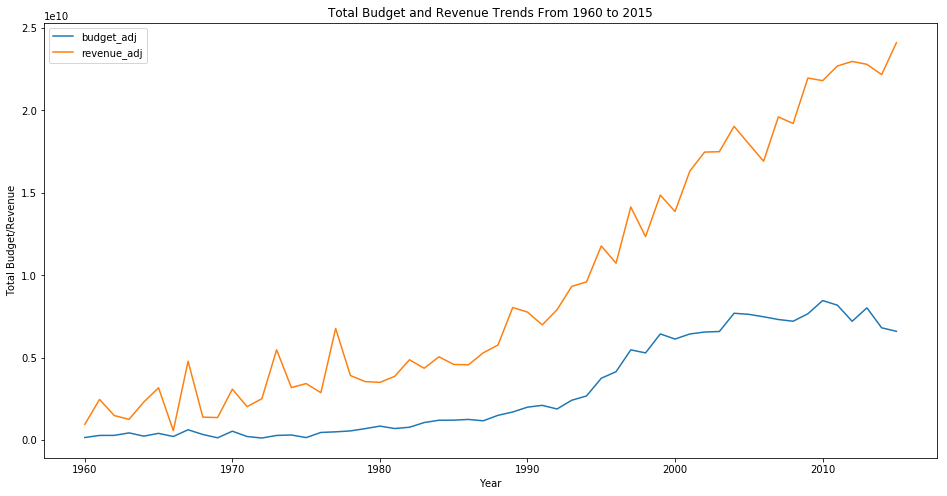

In [40]:
## year-wise trends in mean budgets and reveneus:

# extract mean data:

yearly_revenues_grouped = revenue_df.groupby('release_year', as_index=False)['revenue_adj']
yearly_budgets_grouped = revenue_df.groupby('release_year', as_index=False)['budget_adj']

yearly_budget_sums = yearly_budgets_grouped.sum()
yearly_revenue_sums = yearly_revenues_grouped.sum()


## plotting:
fig = plt.figure(figsize = (16, 8))
a = plt.axes()
a.plot(yearly_budget_sums['release_year'], yearly_budget_sums['budget_adj'])
a.plot(yearly_revenue_sums['release_year'], yearly_revenue_sums['revenue_adj'])
plt.xlabel('Year')
plt.ylabel('Total Budget/Revenue')
plt.title('Total Budget and Revenue Trends From 1960 to 2015')
plt.legend()
plt.show()

From the above plot we can say that the total budget and revenue gained have been increasing significantly over the years.

## Movies Revenue Collection

### Budget

Let's see the relationship between Budget and revenue collected by the movie.

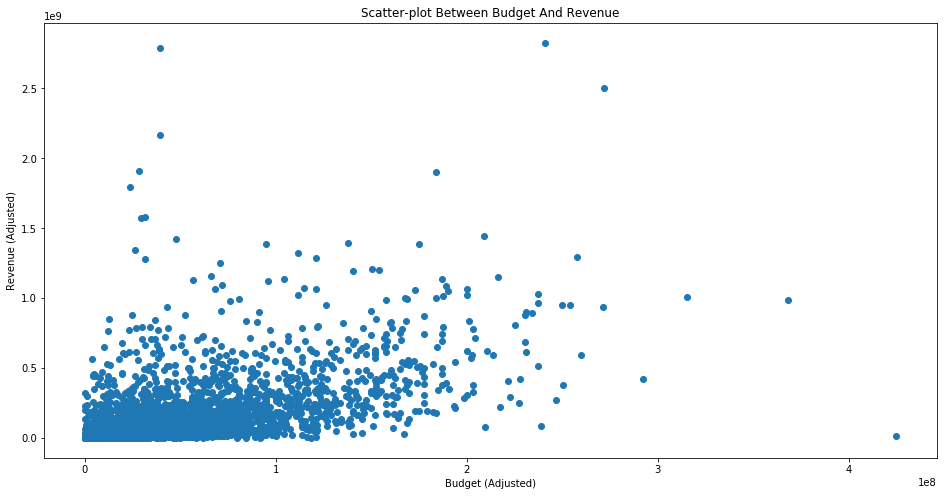

In [41]:
# using matplotlib's scatter() function:

fig = plt.figure(figsize = (16, 8))
a = plt.axes()
a.scatter(revenue_df['budget_adj'], revenue_df['revenue_adj'])
plt.xlabel('Budget (Adjusted)')
plt.ylabel('Revenue (Adjusted)')
plt.title('Scatter-plot Between Budget And Revenue')
plt.show()

It seems that they have moderately positive correlation.
Correlation can be calculated.

In [42]:
# using DataFrame.corr() function and the Pearson method to calculate correlation:
correlations = revenue_df.corr() # returns a dataframe containing pairwise correlation values

print('Correlation(Budget/Revenue):', correlations.loc['budget_adj', 'revenue_adj'])
print('Coefficient of Determination(r-squared):', correlations.loc['budget_adj', 'revenue_adj']**2)

Correlation(Budget/Revenue): 0.5704510195812392
Coefficient of Determination(r-squared): 0.32541436574127536


According to the coefficient of determination, approximately 32.54% of the variation in the revenue is explained by the variation in budgets.

### Popularity


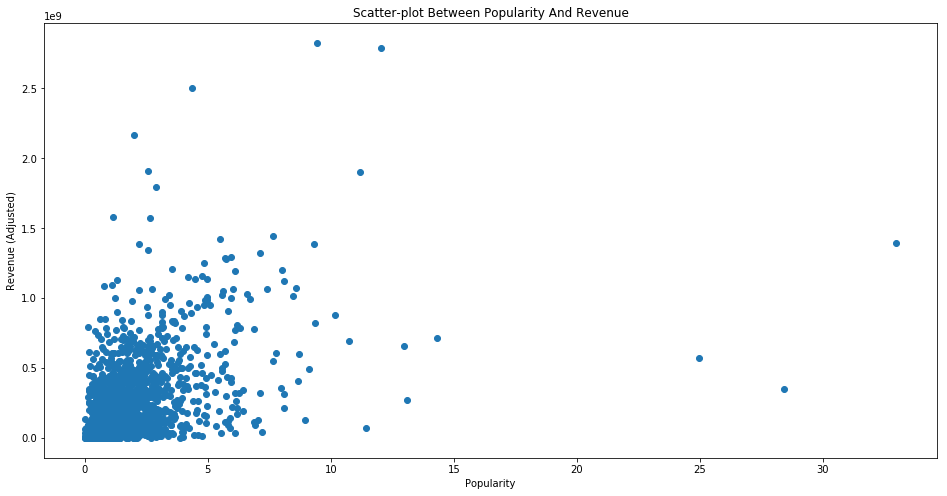

In [43]:
# using matplotlib's scatter() function:

fig = plt.figure(figsize = (16, 8))
a = plt.axes()
a.scatter(revenue_df['popularity'], revenue_df['revenue_adj'])
plt.xlabel('Popularity')
plt.ylabel('Revenue (Adjusted)')
plt.title('Scatter-plot Between Popularity And Revenue')
plt.show()

It seems that they have moderately positive correlation.
Correlation can be calculated.

In [44]:
print('Correlation(Popularity/Revenue):', correlations.loc['popularity', 'revenue_adj'])
print('Coefficient of Determination(r-squared):', correlations.loc['popularity', 'revenue_adj']**2)

Correlation(Popularity/Revenue): 0.5469591846171393
Coefficient of Determination(r-squared): 0.2991643496370459


Approximately 29.9% of the variation in revenue is explained by the variation in popularity.

### Cast

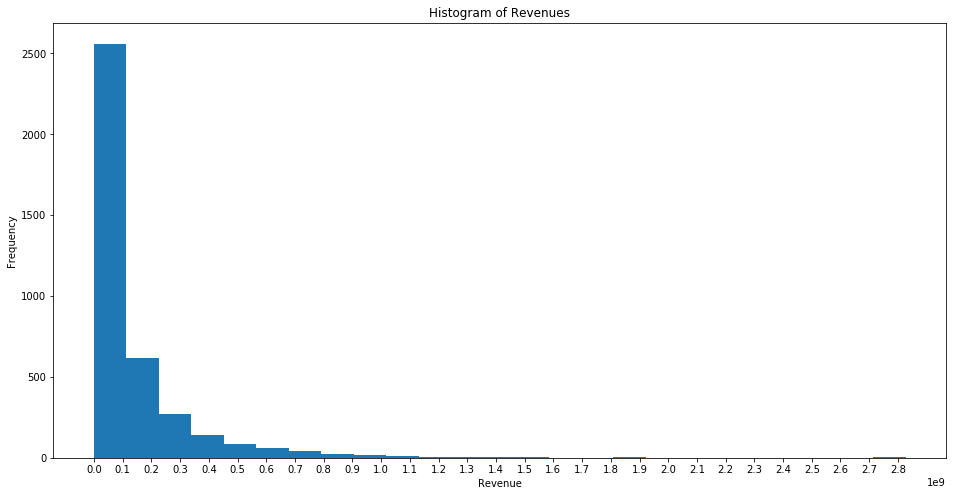

In [46]:
fig = plt.figure(figsize = (16, 8))
a= plt.axes()
a.hist(revenue_df['revenue_adj'], bins=25)
plt.xticks(np.arange(0, revenue_df['revenue_adj'].max()+1, 0.1e9)) # setting a higher frequency for ticks on x axis
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.title('Histogram of Revenues')
plt.show()


In [47]:
# let's take a look at some statistics as well:
print('Revenue Statistics:')
revenue_df['revenue_adj'].describe()

Revenue Statistics:


count    3.854000e+03
mean     1.370647e+08
std      2.161114e+08
min      2.370705e+00
25%      1.835735e+07
50%      6.173068e+07
75%      1.632577e+08
max      2.827124e+09
Name: revenue_adj, dtype: float64

In [48]:
# using pandas' built-in function, quantile()
threshold_revenue = revenue_df['revenue_adj'].quantile(0.7) 

print('Calculated Threshold revenue:', threshold_revenue)

Calculated Threshold revenue: 132085473.38714704


  133 is the threshold revenue.

In [51]:
high_rev_movies = revenue_df[revenue_df['revenue_adj'] >= threshold_revenue]

print('Number of high-revenue movies:', len(high_rev_movies))

Number of high-revenue movies: 1156


In [54]:
# This function will also be useful next analyses regarding genres and production companies

def agg_list(df, column):
    # new_list function aggregate all lists into a single pandas series:
    list_sum = pd.Series(df[column][df[column].notna()].sum())
    
    # converting data to counts of unique elements, in descending order and return:
    counts_desc = list_sum.value_counts(ascending=False)
    return counts_desc
                                   
counts_desc = agg_list(high_rev_movies, 'cast')
print('Total number of actors:', len(counts_desc))



Total number of actors: 2661


In [56]:
# display the top 20 actors:
print('\nThe top 20:\n')
pprint(counts_desc.head(20))


The top 20:

Tom Cruise               27
Brad Pitt                22
Tom Hanks                21
Eddie Murphy             20
Robert De Niro           20
Sylvester Stallone       19
Harrison Ford            19
Bruce Willis             19
Adam Sandler             18
Jim Carrey               18
Samuel L. Jackson        17
Cameron Diaz             17
Ben Stiller              17
Will Smith               17
Arnold Schwarzenegger    17
Denzel Washington        17
Robin Williams           16
Mel Gibson               16
Sean Connery             15
Nicolas Cage             15
dtype: int64


With no surprise Tom Cruise is the most demanding actor

#### Genres

In [59]:
counts = agg_list(high_revenue_movies, 'genres')
print('Total number of genres:', len(counts))

# display the top 3 genres:
print('\nThe top 3:\n')
pprint(counts.head(3))

Total number of genres: 18

The top 3:

Action    458
Drama     405
Comedy    400
dtype: int64


Action, Drama and Comedy are the genres which are mostly liked by all.

### Production Companies


In [60]:
counts = agg_list(high_rev_movies, 'production_companies')
print('Total number of production companies:', len(counts))

# display the top 3 production companies:
print('\nThe top 3:\n')
pprint(counts.head(3))

Total number of production companies: 1010

The top 3:

Universal Pictures    148
Warner Bros.          146
Paramount Pictures    135
dtype: int64


### Directors


In [61]:
top_directors = pd.Series(high_rev_movies['director']).dropna()
counts = top_directors.value_counts(ascending=False)

print('Total number of directors:', len(counts))

# display the top 3 directors:
print('\nThe top 3:\n')
pprint(counts.head(3))

Total number of directors: 555

The top 3:

Steven Spielberg    23
Robert Zemeckis     13
Tim Burton          11
Name: director, dtype: int64


<a id='conclusions'></a>
## Conclusions:
Trends of movies budget and revenue over the years.
Characterisation of movies with highest revenues by considering following:
Budget
Popularity
Cast
Genres
Director
Finding the best cordination of actor and director for highest revenue movie.

### Research questions 1: Trends of movies budget and revenue over the years.

The plots and statistcs show clearly that the movie industry has grown manifold since the 1960's and if things keep going as they are now, the movie industry will grow even more.It is obvious that the movie industry has grown tremendously, even the plot has shown the significant growth in the budget and 
revenue since 1960, with this we can say that the movie industry has widen its scope and opportunities which leads the industry to grown markebly high over the years


### Research questions 2: Characteristics of movies with high revenues

We can predict which movie will have high revenue by:


* __High Budget__: The positive correlation shown by my analysis means that a movie with a high budget will have a good chance of getting a high revenue, even though it is not entirely necessary.
* __High Popularity__: Popularity also has a positive correlation with revenue. So I would single out movies with high popularity.
* __Cast__: I would look for movies that have the top actors from my analysis like Tom Cruise, Brad Pitt,Tom Hanks, Eddie Murphy, Robert De Niro, Sylvester Stallone etc. 
* __Genres__: I would consider movies with Action, Drama, Comedy, Adventure and Thriller genres.
* __Production Companies__: I would look for movies from Universal Studios, Paramount Pictures, Warner Bros. Twentieth Century Fox and other top production companies from my analysis.
* __Director__: I would look for movies directed by Steven Spielberg, Michael Bay, Ridley Scott and other top directors.

### Research questions 3: Finding the best cordination of actor and director for highest revenue movie.


###                 a: List of top directors


The top most actors are:

                * Tom Cruise        27
                * Brad Pitt         22
                * Tom Hanks         21
                * Robert De Niro    20
                * Eddie Murphy      20

These actors are the best actors of the film  industries and thus they have more fan followings and their work is appreciated more comparative to others.

###                b: List of top directors

The top 5:

                * Steven Spielberg    23
                * Robert Zemeckis     13
                * Tim Burton          11
                * Tony Scott          10
                * Michael Bay         10
                
The director Steven Spielberg is the best record setter of 23 movies and thus it can be concluded that he is the best director to work with.

Thus any combination of these actors and directors will be the best and leads to a successful high budget and high revenue movie which will be very obviously more popular than the others.


## Limitation

* I have not included tests to prove the statistical significance of my results.
* While cleaning the data, I had to remove a lot of movies from the analysis. So the results may only be partially true.
